## Grafs 22/23 - Sheet 4 - Due 2 December 2022

# Weights and distances

### Weighted graphs

Sage graphs admit edge labels, which can be used to indicate edge weights. 

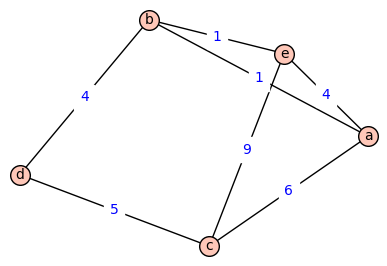

[('a', 'b', 1), ('a', 'c', 6), ('a', 'e', 4), ('b', 'd', 4), ('b', 'e', 1), ('c', 'd', 5), ('c', 'e', 9)]
a c 6


In [1]:
G1=Graph()
G1.add_edge('a','b',1)
G1.add_edge('a','c',6)
G1.add_edge('a','e',4)
G1.add_edge('b','e',1)
G1.add_edge('b','d',4)
G1.add_edge('c','d',5)
G1.add_edge('c','e',9)

G1.show(edge_labels=True)

print(G1.edges())

print('a','c', G1.edge_label('a','c'))


You can indicate that a graph `G` is weighted with  `G.weighted(True)`, but this only changes the equality test, that now uses edge weights.

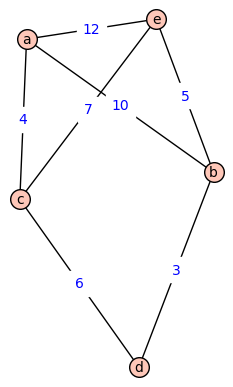

True
False


In [2]:
G2=Graph()
G2.add_edge('a','b',10)
G2.add_edge('a','c',4)
G2.add_edge('a','e',12)
G2.add_edge('b','e',5)
G2.add_edge('b','d',3)
G2.add_edge('c','d',6)
G2.add_edge('c','e',7)

G2.show(edge_labels=True)

print(G1==G2)

G1.weighted(True)
G2.weighted(True)

print(G1==G2)

### Dictionaries

Recall that a python dictionary is an object that allows storing pairs `(key,value)`, and you can access or change the value associated to a key. You can think of a dictionary as a (mathematical) function `f : key -> value`.

In [3]:
prices = {'apple' : 2, 'banana' : 7} #this is a dictionary
print(prices)
print('price of apple =', prices['apple'])

prices['orange'] = 3 #add an element like this
print(prices)

prices['apple'] = 100 #change the value associated to a key like this
print(prices)

prices.pop('apple') #remove an element like this
print(prices)

{'apple': 2, 'banana': 7}
price of apple = 2
{'apple': 2, 'banana': 7, 'orange': 3}
{'apple': 100, 'banana': 7, 'orange': 3}
{'banana': 7, 'orange': 3}


In [4]:
#you can also initialize a dictionary with an iterable collection
squares = {n : n*n for n in range(10)}
print(squares)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


In [5]:
#also if you have a list of keys and a list of values (of the same length)
my_list_x = ['apple', 'banana', 'coconut', 'durian']
my_list_y = [2, 3, 'sold out', 5]
my_dict = {my_list_x[i] : my_list_y[i] for i in range(len(my_list_x))}
print(my_dict)

{'apple': 2, 'banana': 3, 'coconut': 'sold out', 'durian': 5}


In [6]:
#finally, you can iterate over the elements in a dictionary...

#this will only get you the keys (the first component of the pairs)
for u in my_dict:
    print(u)

print()    

#if you want both the easiest way is the following
for u in my_dict:
    print(u,'->',my_dict[u])

apple
banana
coconut
durian

apple -> 2
banana -> 3
coconut -> sold out
durian -> 5


## Exercise 1

Implement Dijkstra's algorithm.
<!-- using a `heapq`. -->
Given a weighted graph `G` and a root vertex `v`, the function `Dijkstra(G,v)` should return a dictionary `dist` of distances (return `dist[u] = Infinity` if the vertices `v` and `u` are not connected) from `v` to all vertices of `G`, and a spanning tree `T` such that $dist_T(u,v)=dist_G(u,v)$ for all vertices $u\in G$.

In [11]:
from sage.rings.infinity import Infinity

def Dijkstra(G,v):
    dist={u:Infinity for u in G.vertices()} #this is a python dictionary
    dist[v]=0
    T=Graph()
    parent={}
    
    while True:
        #find the vertex in G\T with minimum D(u)
        min_dist=Infinity
        for u in set(G.vertices()).difference(set(T.vertices())):
            if dist[u]<min_dist:
                w=u
                min_dist=dist[u]
        if min_dist==Infinity:
            break
        T.add_vertex(w)
        if w!=v:
            T.add_edge(w,parent[w],dist[w]-dist[parent[w]])
        
        for n in set(G[w]).difference(set(T.vertices())):
            if dist[w]+G.edge_label(w,n)<=dist[n]:
                dist[n]=dist[w]+G.edge_label(w,n)
                parent[n]=w
                
        if G.vertices()==T.vertices():
            break
    
    return T,dist

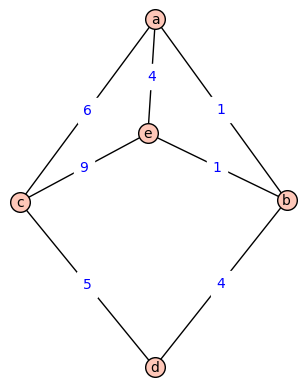

{'a': 0, 'b': 1, 'c': 6, 'd': 5, 'e': 2}


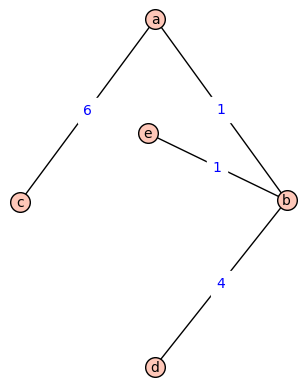

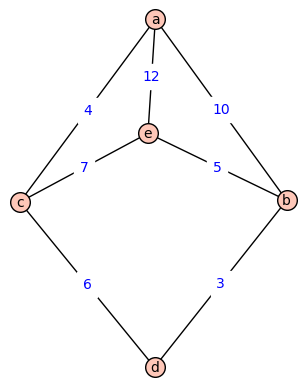

{'a': 0, 'b': 10, 'c': 4, 'd': 10, 'e': 11}


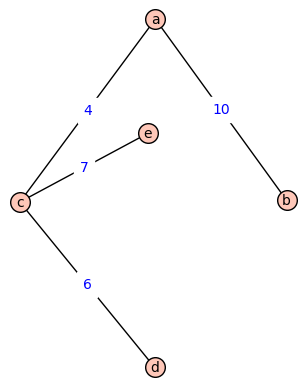

In [8]:
G=G1
v='a'

G.plot(save_pos=True,edge_labels=True).show()
pos=G.get_pos()

T,d=Dijkstra(G,v)

print(d)
T.plot(pos=pos,edge_labels=True).show()



G=G2
v='a'

G.plot(pos=pos,edge_labels=True).show()

T,d=Dijkstra(G,v)

print(d)
T.plot(pos=pos,edge_labels=True).show()

## Exercise 2

Use Dijkstra's algorithm to implement a function `eccentricity(G,v)` that computes the eccentricity of a vertex `v` in a weighted graph `G`. Recall that the eccentricity of a vertex is the maximal distance to `v` from any other vertex.

In [9]:
def eccentricity(G,v):
    
    _,d= Dijkstra(G,v)
    
    ecc=0
    for v in d:
        if d[v]>ecc:
            ecc=d[v]
    
    return ecc

In [10]:
for v in G1.vertices():
    print(v, eccentricity(G1,v))

print()

for v in G2.vertices():
    print(v, eccentricity(G2,v))

a 6
b 7
c 8
d 5
e 8

a 11
b 10
c 9
d 10
e 11


Use Dijkstra's algorithm to compute the diameter of a Graph.

In [11]:
def diameter(G):
    l=[]
    for v in G.vertices():
        l.append(eccentricity(G,v))
    
    return max(l)

In [12]:
print(diameter(G1))
print(diameter(G2))

8
11


The center of a connected weighted graph `G` is the set of vertices with minimum eccentricity.

Using Dijkstra, find the center of a graph. The function `center(G)` should return the vertices that form the center of `G` (as a `set`). You may assume that `G` is connected.

In [13]:
def center(G):
    l=[]
    s=set()
    for v in G.vertices():
        l.append(eccentricity(G,v))

    for v in G.vertices():
        if eccentricity(G,v)==min(l):
            s.add(v)
    return s

In [14]:
print(center(G1))
print(center(G2))

{'d'}
{'c'}


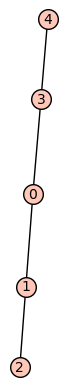

{0}


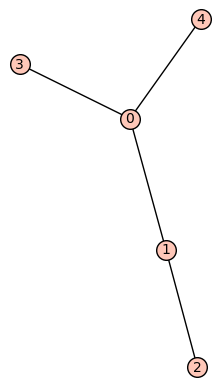

{0, 1}


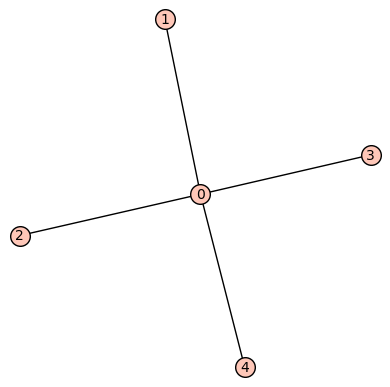

{0}


In [15]:
for T in graphs.trees(5):
    for u,v,l in T.edges():
        T.set_edge_label(u,v,1)
    T.show()

    print(center(T))

## Exercise 3
Implement a function that finds the center of an unweighted tree as dicussed in the lecture. Assume that the vertices are labelled from $0$ to $n-1$.

In [16]:
def TreeCenter(T):
    T1=T.copy()
    while T1.order()>2:
        l=[] #list of leaves
        for v in T1.vertices():
            if T1.degree(v)==1:
                l.append(v)
        T1.delete_vertices(l) #delete all leaves
    return T1.vertices()

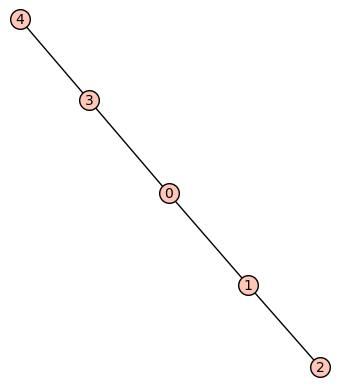

[0]


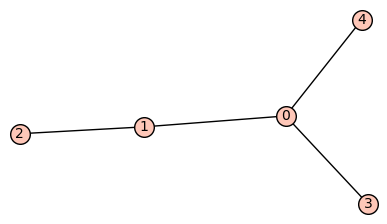

[0, 1]


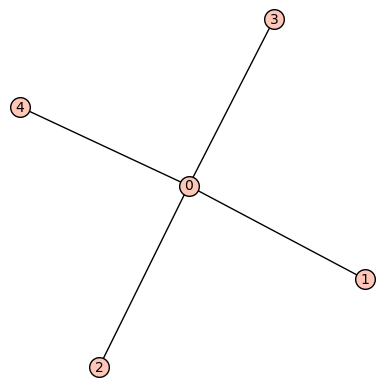

[0]


In [17]:
for T in graphs.trees(5):
    T.show()
    print(TreeCenter(T))

## Exercise 4
Implement the algorithm from the lecture that finds the center of a tree with arbitrary weights.

In [72]:
from sage.rings.infinity import Infinity
import numpy

def down_ecc(T,marked,v,decc):
    #T = tree, marked = set of visited vertices, v = current vertex, decc = list of down eccentricities
    marked.append(v)
    
    if T.degree(v)==1 and v!=marked[0]:
        decc[v]=0
        return
    m=-Infinity
    for u in T[v]:
        if u not in marked:
            down_ecc(T,marked,u,decc)
            if decc[u]+T.edge_label(u,v)>m:
                m=decc[u] + T.edge_label(u,v)

    decc[v]=m
    
    return
    
    
def up_ecc(T,marked,v,uecc,decc):
    #T = tree, marked = set of visited vertices, v = current vertex, uecc = list of down eccentricities
    
    marked.append(v)
    uecc[marked[0]]=0 #we'll assume the first vertex entered is the root 
    sons=[]
    p=[]
    
    if T.degree(v)==1 and v!=marked[0]: #CASE 1: LEAF
        return
    elif T.degree(v)==2 or v==marked[0]: #CASE 2: 1 SON
        for u in T[v]:
            if u not in marked:
                uecc[u]=uecc[v]+T.edge_label(u,v)
                up_ecc(T,marked,u,uecc,decc)
    else: #CASE 3: >=2 SONS
        for u in T[v]:
            if u not in marked:
                sons.append(u)
        for t in range(len(sons)):
            p.append(decc[v]+T.edge_label(v,sons[t]))
        
        sortind=numpy.argsort(p)
        for k in range(len(sortind)):
            if sortind[k]==0:
                i=k
            if sortind[k]==1:
                j=k
            
        uecc[sons[i]]=T.edge_label(sons[i],v)+max([uecc[v],p[j]])
        for k in range(len(sons)):
            if k!=0:
                uecc[sons[k]]=T.edge_label(v,sons[k])+max([uecc[v],p[i]])
            up_ecc(T,marked,sons[k],uecc,decc)
            
    return
        
def wTreeCenter(T):
    for u in T.vertices():
        if T.degree(u)==1:
            v=u
            break
    m=[] #start recursion with no vertices marked
    decc=[-Infinity]*T.order()
    down_ecc(T,m,v,decc)
    
    m=[] #start other recursion with no vertices marked
    uecc=[-Infinity]*T.order()

    up_ecc(T,m,u,uecc,decc)

    ecc=['TODO' for i in range(T.order())] #this will be the list of (true) eccentricities

    Mecc=-Infinity
    for i in range(len(ecc)):
        ecc[i]=max([uecc[i],decc[i]])
        if ecc[i]>Mecc:
            Mecc=ecc[i]
    center=set()
    for i in range(len(ecc)):
        if ecc[i]==Mecc:
            center.add(i)
    
    
    return center

In [20]:
import numpy
l=[3,2,4,5]
ind=numpy.argsort(l)
print(l)
print(ind)

[3, 2, 4, 5]
[1 0 2 3]


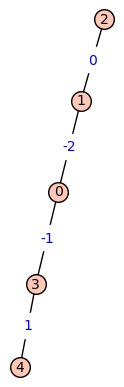

{3}


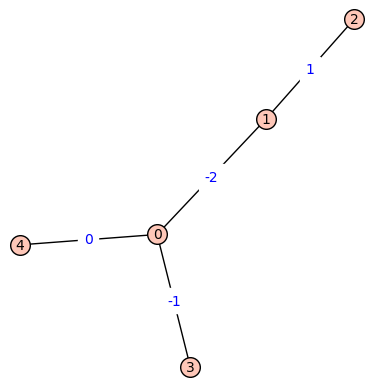

{1}


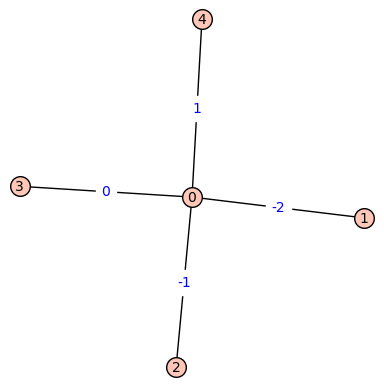

{0, 4}


In [73]:
from sage.rings.infinity import Infinity
for T in graphs.trees(5):
    n=T.order()
    decc=[-Infinity]*n
    uecc=[-Infinity]*n
    T.weighted(True)
    c=-2
    for e in T.edges():
        T.set_edge_label(e[0],e[1],c)
        c+=1
    T.show(edge_labels=True)
    print(wTreeCenter(T))

## Exercise 5

Implement Kruskal's algorithm.

The function `Kruskal(G)` should return, given a weighted graph `G`, a minimum spanning tree `T` (as a Sage graph) and the weight of the minimum spanning tree `best_weight`. You may assume `G` is connected.

In [22]:
from sage.rings.infinity import Infinity
def weight(e):
    return e[2]

def Kruskal(G):
    T = Graph()
    T.add_vertices(G.vertices())
    best_weight=0
    order=[]
    E=list(G.edges())
    E.sort(key=weight)
    for e in E:
        if e[0] not in T.connected_component_containing_vertex(e[1]):
            T.add_edge(e)
            best_weight+=e[2]
    
    return (T, best_weight)

In [ ]:
for G in [G1,G2]:

    G.plot(save_pos=True,edge_labels=True).show()
    pos=G.get_pos()

    T,w=Kruskal(G)

    print(w)
    T.plot(pos=pos,edge_labels=True).show()



## Exercise 6

Implement Prim's algorithm.

The function `Prim(G)` should return, given a weighted graph `G`, a minimum spanning tree `T` (as a Sage graph) obtained by using Prim's algorithm with root `v` and the weight of the minimum spanning tree `best_weight`. You may assume `G` is connected.

In [ ]:
from sage.rings.infinity import Infinity
def Prim(G,v):
    T = Graph()
    best_weight=0
    T.add_vertex(v)
    E=list(G.edge_boundary(v))
    
    while True:
        w=Infinity
        for e in E:
            if (e[0] in T.vertices() and e[1] not in T.vertices()) or (e[0] not in T.vertices() and e[1] in T.vertices()):
                if e[2]<w:
                    w=e[2] 
                    min_e=e
        if w==Infinity:
            break
        T.add_edge(min_e)
        best_weight+=min_e[2]
        
        for e in G.edge_boundary(min_e):
            E.append(e)
        E.remove(min_e)
       
    
    return (T, best_weight)

In [ ]:

for G in [G1,G2]:

    G.plot(save_pos=True,edge_labels=True).show()
    pos=G.get_pos()

    T,w=Prim(G,G.vertices()[0])

    print(w)
    T.plot(pos=pos,edge_labels=True).show()

## Priority Queues

The previous algorithms require "finding the smallest element in a set" as a key step, be it finding the nearest vertex, or the shortest edge.

A naive way of doing this is looking at all elements of the set and finding the smallest, but it can be done faster using a "priority queue".

A priority queue is a data structure that sorts elements in a way that you can efficiently add elements, look at the minimum, and delete the minimum.

Python provides an efficient implementation of priority queues that uses [binary heaps](https://en.wikipedia.org/wiki/Binary_heap) in the library [heapq](https://docs.python.org/3/library/heapq.html).

In [ ]:
from heapq import heapify, heappop, heappush

H = [(2,"A"),(1,"B"),(2,"C"),(3,"D")]

heapify(H)

print(H) #still looks like a list (but now it has an extra structure as a heap)

print(H[0], "is the smallest element")

s=heappop(H) #gives the smalles element and removes it from the queue
print(s, "was the smallest element")
    
print(H)
print(H[0], "is the smallest element")
#Notice that it sorts by the first component, and in case of tie, it sorts by second component.

heappush(H,(1,"E")) #adds a new element and mantains the heap structure 
#(use instead of append if you want to keep the heap structure) 

print(H)
print(H[0], "is the smallest element")




## Exercice 7

Implement Dijkstra's algorithm using a priority queue. 

In [28]:
from sage.rings.infinity import Infinity
from heapq import heapify, heappop, heappush


def fastDijkstra(G,v):
    dist={u:Infinity for u in G.vertices()} #this is a python dictionary
    dist[v]=0
   
    T=Graph()
    parent={}
    
    V=[(0,v)]
    heapify(V)
    
    while True:
        w=V[0][1]
        heappop(V)
        if w not in T.vertices():
            T.add_vertex(w)
        
            if w!=v:
                T.add_edge(w,parent[w], G.edge_label(w,parent[w]))
            
            for u in set(G[w]).difference(set(T.vertices())):
                if G.edge_label(w,u)+dist[w]<dist[u]:
                    dist[u]=G.edge_label(w,u)+dist[w]
                    heappush(V,(dist[u],u))
                    parent[u]=w
            if G.vertices()==T.vertices():
                break
    
    return T,dist




In [ ]:
G=G1
v='a'

G.plot(save_pos=True,edge_labels=True).show()
pos=G.get_pos()

T,d=fastDijkstra(G,v)

print(d)
T.plot(pos=pos,edge_labels=True).show()



G=G2
v='a'

G.plot(pos=pos,edge_labels=True).show()

T,d=fastDijkstra(G,v)

print(d)
T.plot(pos=pos,edge_labels=True).show()

In [29]:
import time,random

G=graphs.RandomGNP(5000,.0025)


while not G.is_connected():
    print("Random graph was not connected. Let's try again" )
    G=graphs.RandomGNP(5000,.0025)

for e in G.edges():
    G.set_edge_label(e[0],e[1],random.randint(0,100))
    



start_time = time.time()

Dijkstra(G,1)  

time_naive=time.time() - start_time
    
start_time = time.time()
    
fastDijkstra(G,1)  

time_fast=time.time() - start_time
    
print("naive:", time_naive,"fast:", time_fast)


naive: 13.049526691436768 fast: 6.654147148132324
